In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
db_train = pd.read_csv('train.csv')
db_test = pd.read_csv('test.csv')

In [60]:
db_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [61]:
db_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [62]:
db_test = db_test.drop('id', axis=1)

In [63]:
db_train.shape

(2000, 21)

In [64]:
db_test.shape

(1000, 20)

In [65]:
db_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [66]:
db_test.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [67]:
db_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [68]:
db_test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [69]:
db_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


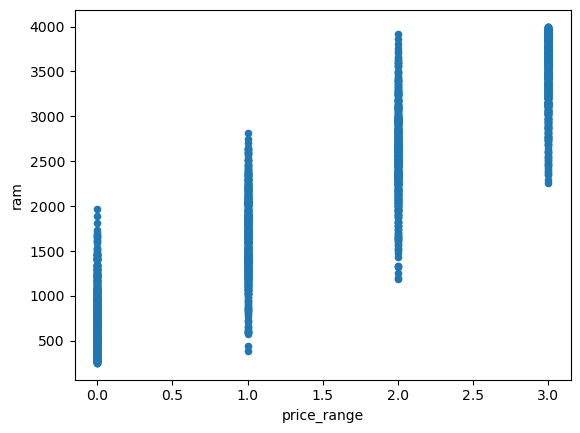

In [70]:
db_train.plot(x='price_range', y='ram', kind='scatter')
plt.show()

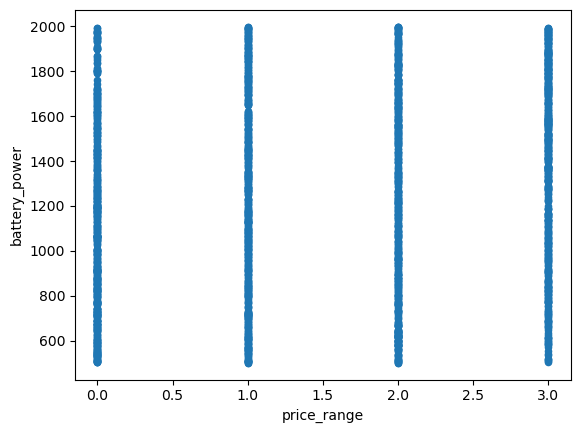

In [71]:
db_train.plot(x='price_range', y='battery_power', kind='scatter')
plt.show()

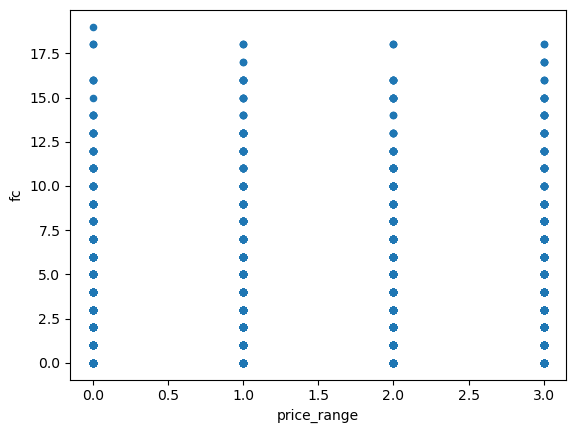

In [72]:
db_train.plot(x='price_range', y='fc', kind='scatter')
plt.show()

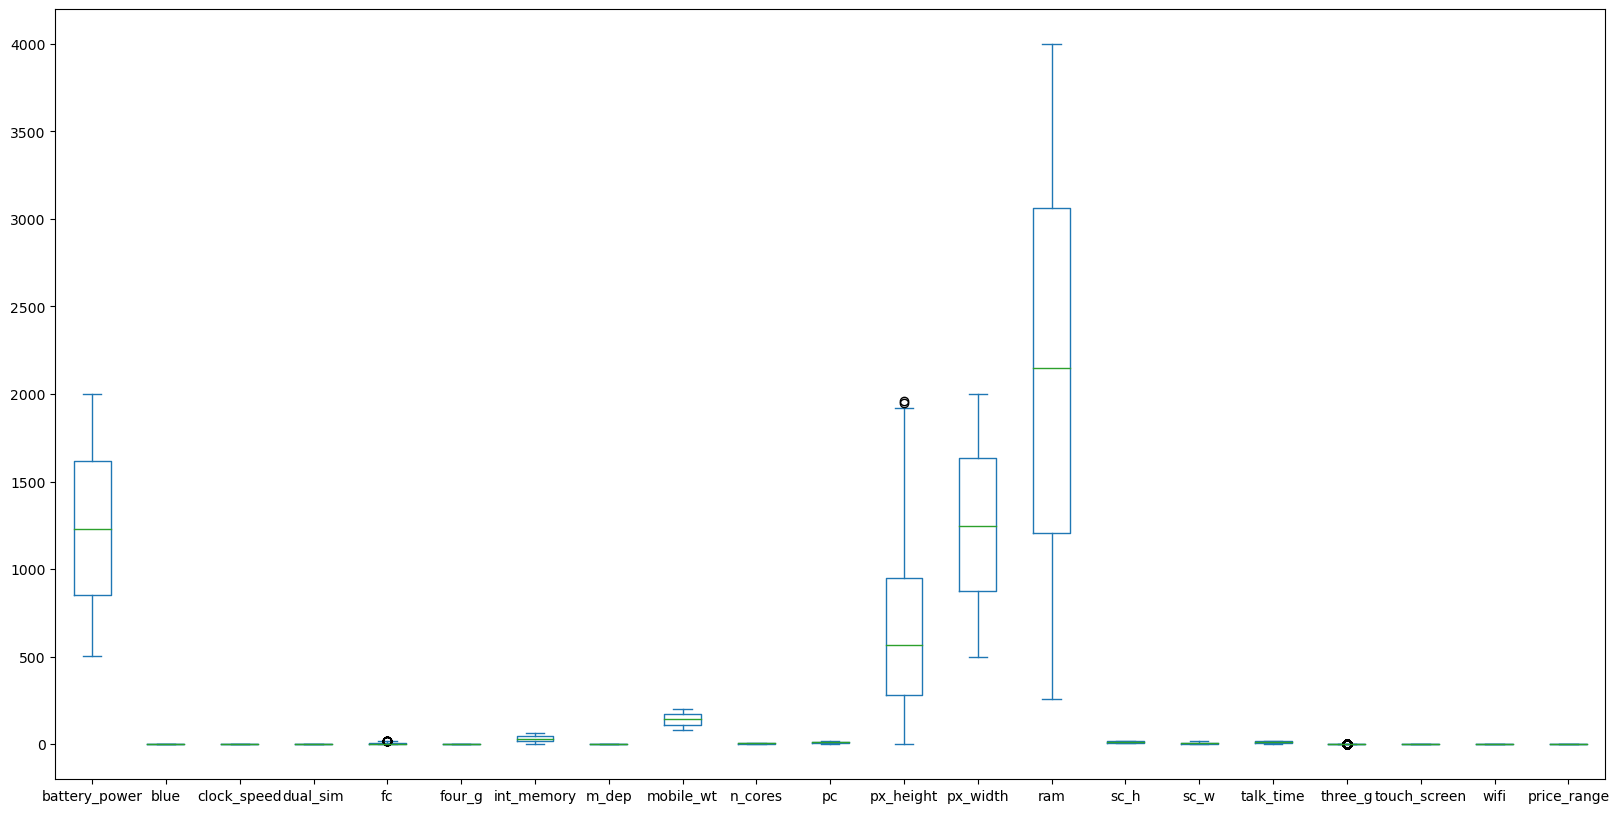

In [73]:
db_train.plot(kind='box', figsize=(20,10))
plt.show()

In [74]:
X = db_train.drop('price_range', axis=1)
Y = db_train['price_range']

In [75]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [76]:
X_std = std.fit_transform(X)
db_test_std = std.transform(db_test)

In [77]:
X_std

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [78]:
db_test_std

array([[-0.44505984,  1.0100505 ,  0.34046327, ..., -1.78686097,
         0.99401789, -1.01409939],
       [-0.90487356,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.29403758,  1.0100505 ,  1.56625363, ..., -1.78686097,
         0.99401789,  0.98609664],
       ...,
       [-0.12182446, -0.9900495 , -0.14985287, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 0.67032987,  1.0100505 , -1.2530642 , ..., -1.78686097,
         0.99401789, -1.01409939],
       [ 0.07166151,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811,  0.98609664]])

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [80]:
dt.fit(X_std, Y)

DecisionTreeClassifier()

In [81]:
dt.predict(db_test_std)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 0, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 0,
       2, 0, 1, 2, 3, 0, 2, 1, 0, 2, 0, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 2, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 3, 2, 2, 0, 2,
       1, 1, 3, 0, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 1, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 2, 2, 1, 2,
       3, 3, 3, 1, 1, 1, 2, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 3, 3, 1,

In [83]:
dt.score(X_std, Y) * 100

100.0

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [90]:
knn.fit(X_std, Y)

KNeighborsClassifier()

In [92]:
knn.predict(db_test_std)

array([2, 3, 1, 3, 2, 1, 3, 1, 2, 0, 3, 2, 0, 1, 3, 0, 1, 1, 3, 1, 1, 3,
       0, 0, 3, 2, 1, 0, 2, 0, 2, 2, 3, 0, 1, 1, 2, 0, 3, 2, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 3, 1, 2, 2, 3, 2, 1, 1, 0, 0,
       1, 1, 1, 2, 0, 1, 3, 1, 3, 0, 1, 1, 1, 2, 0, 2, 3, 1, 2, 0, 2, 1,
       1, 1, 2, 3, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 3, 1, 2, 1, 1, 2, 2,
       3, 0, 1, 3, 3, 2, 3, 2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 1, 3, 2, 2, 0, 3, 2, 0, 2, 1, 3, 3, 2, 2, 2, 2, 1, 3, 1, 1, 2,
       1, 1, 3, 3, 2, 0, 2, 2, 2, 3, 3, 3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 3, 0, 1, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 3, 3, 2, 0, 2, 0, 3,
       1, 0, 3, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 3, 0, 2, 0,
       0, 2, 1, 2, 3, 2, 1, 1, 2, 0, 0, 2, 2, 3, 0, 3, 3, 1, 3, 1, 0, 2,
       2, 3, 3, 0, 0, 0, 2, 3, 1, 0, 3, 2, 0, 3, 0, 2, 1, 0, 0, 3, 2, 3,
       2, 1, 1, 2, 3, 0, 3, 1, 2, 0, 1, 0, 1, 2, 1,

In [93]:
knn.score(X_std, Y) * 100

69.89999999999999

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [95]:
lr.fit(X_std, Y)

LogisticRegression()

In [96]:
lr.predict(db_test_std)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [97]:
lr.score(X_std, Y) * 100

97.85000000000001

In [ ]:
#NEW

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [156]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [157]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [158]:
y_pred = dt.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score

In [160]:
dt_ac = accuracy_score(y_test, y_pred ) * 100
dt_ac

83.75

In [161]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [163]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [164]:
y_pred = knn.predict(X_test_std)

In [165]:
from sklearn.metrics import accuracy_score

In [166]:
knn_ac = accuracy_score(y_test, y_pred) * 100
knn_ac

52.25

In [167]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [168]:
lr.fit(X_train_std, y_train)

LogisticRegression()

In [169]:
y_pred = lr.predict(X_test_std)

In [170]:
from sklearn.metrics import accuracy_score

In [178]:
lr_ac = accuracy_score(y_test, y_pred) * 100
lr_ac

96.0

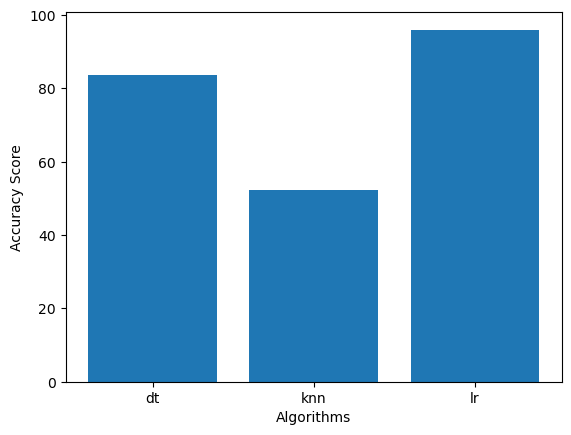

In [176]:
plt.bar(x=['dt','knn','lr'], height=[dt_ac, knn_ac, lr_ac])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()

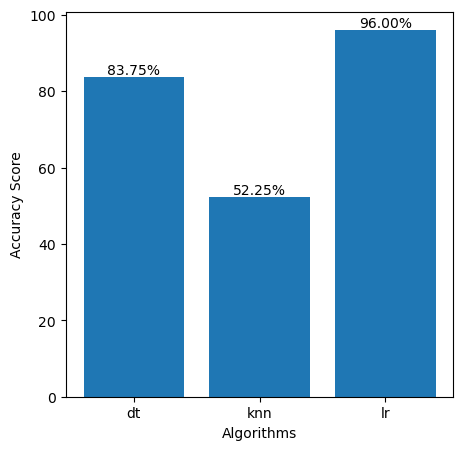

In [185]:

# Define the data
algorithms = ['dt', 'knn', 'lr']
accuracy_scores = [dt_ac, knn_ac, lr_ac]

# Create a figure with a specific size (e.g., 10x6 inches)
plt.figure(figsize=(5, 5))

# Create the bar graph
plt.bar(algorithms, accuracy_scores)

# Add accuracy scores above the bars
for i, score in enumerate(accuracy_scores):
    plt.text(algorithms[i], score, f'{score:.2f}%', ha='center', va='bottom')

# Label the axes
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')

# Show the plot
plt.show()
